In [1]:
import scipy.misc
from scipy import ndimage
import numpy as np
path="./ishor.jpg"
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [2]:
image=np.array(ndimage.imread(path,flatten=False))
image=scipy.misc.imresize(image,(75,75)).reshape(75,75,3)
image=image.reshape(75*75,3)
image=image/255

c:\users\ak\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.
c:\users\ak\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [3]:
def closest_Centroid_image(centroids): 
    idx=np.zeros((len(image),1))
    for i in range(len(image)):
        distances=np.zeros((len(centroids),1))
        for j in range(len(centroids)):
               distances[j,:]=np.sqrt(np.sum(np.square(image[i,:]-centroids[j,:])))
        val=np.min(distances)
        idx[i,:]=list(distances).index(val)
    return idx

In [4]:
def initial_centroid(image_pixel,k):
    np.random.seed(0)
    image_centroid=np.zeros((k,3))
    permpt=list(np.random.permutation(image_pixel.shape[0]))
    image_centroid=image_pixel[permpt[0:k],:]
    return image_centroid

In [5]:
def centroid_mean_image(idx,no_k):   
    mean=np.zeros((no_k,3))
    for k in range(no_k):
        pos=[]
        for i in range(len(idx)):
            if k==idx[i]:
                pos.append(image[i,:])
        pos=np.array(pos)
        mean[k,:]=np.sum(pos,axis=0)/len(pos)
    return mean

In [6]:
%matplotlib notebook

In [7]:
value=initial_centroid(image,k=5)
for i in range(10):
    idx=closest_Centroid_image(value)
    idx=idx.astype("int")
    mean_val=centroid_mean_image(idx,no_k=5)
final_image =mean_val[idx,:];
print(mean_val.shape)
final_image=final_image.reshape((5625,3))
final_image=final_image.reshape((75,75,3))



(5, 3)


<IPython.core.display.Javascript object>


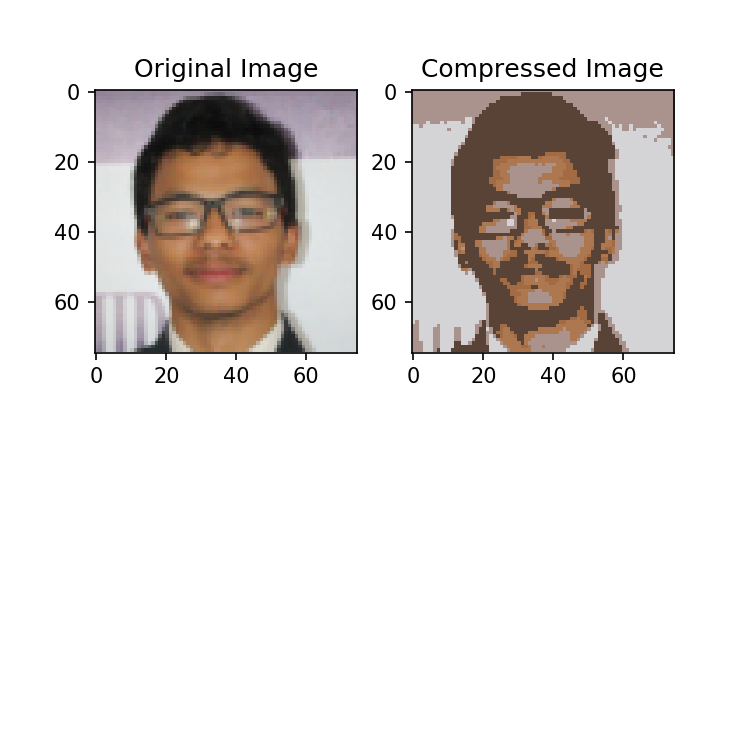

Text(0.5,1,'Compressed Image')

In [9]:
image=image.reshape((75,75,3))
fig=plt.figure(figsize=(5,5))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax1.imshow(image)
ax1.set_title("Original Image")
ax2.imshow(final_image)
ax2.set_title("Compressed Image")

In [10]:
print(image.shape)

(75, 75, 3)
